In [1]:
# We will investigate absorption of zebra patterned graphene on a beam with the independent variable of ablation thickness, ranging 8,16,..,40um while other parameters are fixed. We will see how absoption changes with ablated part getting larger, and also look for fluctuations when the graphene is shifted, keeping the beam fixed.
# Resolution: 40, J threshold for beam matrix: 10**-10, w=35, Ep: 0.040045414 (calculated by integration of initialized beam matrix), width between ablated regions:8 um, other variables at default of beam.py file.

In [ ]:
# Mind that while running, it takes up to 4.8 GiB memory
from beam import *

ee = beam_initialize(res=40, threshold=10**-10, w=35)
for i in range(8,48,8):  # Ablation thickness values are traversed
    mm = mask_initialize(beam=ee, shape='lines',width=8,thickness=i,crop=False)
    bitter = mask_slide_iterator(beam=ee,mask=mm,stepsY=(i+8))  # Slider slides graphene layer 1um at a time
    file = open(str(i)+".txt","w")
    file.write(f"Res 40, threshold 10**-10, w=35, zebra width=8\n")
    file.write(f"Zebra thickness: {str(i)}\n")
    counter = 0
    for j in bitter:
        k = integrate_for_energy(j[1])
        file.write(f"Step {counter}: {str(k)}\n")
        counter += 1
        del(j)
    del(mm)
    del(bitter)
    file.close()

In [6]:
# The results are as follows:
results = []
for j in [2,4,8,16,24,32,40]:
    a = []
    with open(f"{j}.txt",'r') as file:
        for i in range(2):
            _ = file.readline()
        for i in file.readlines():
            a.append(float(i.split()[2]))
    results.append(a)

In [3]:
import matplotlib.pyplot as plt

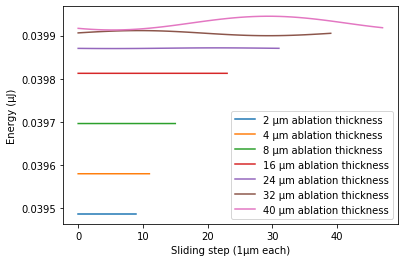

In [27]:
# The energy results for each ablation thickness configuration are below
# Each configuration is calculated for graphene sliding steps of 1um until initial ablation distribution is reached
configs = [2,4,8,16,24,32,40]
for i in range(7):
    plt.plot(results[i], label=f"{str(configs[i])} μm ablation thickness")
plt.ylabel('Energy (μJ)')
plt.xlabel('Sliding step (1μm each)')
# Note that for every graphene pattern, there are 8um between ablated regions
plt.legend(loc = 'best')
# From blue to purple represent ablation thickness of 2,4,8,16,24,32,40um
# Energy values in uJ

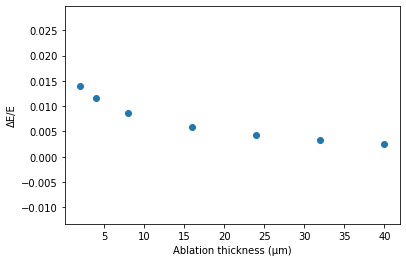

In [20]:
# The deltaE over initialE values for max transmission of each configuration are as follows:
Ep = 0.040045414  # Ep of initial beam, calculated by integration over its matrix
plt.scatter(configs, [((Ep-max(i))/Ep) for i in results])
plt.ylabel('ΔΕ/E')
plt.xlabel('Ablation thickness (μm)')
plt.show()
# This concludes our first investigation planned on March 2nd, 2020.

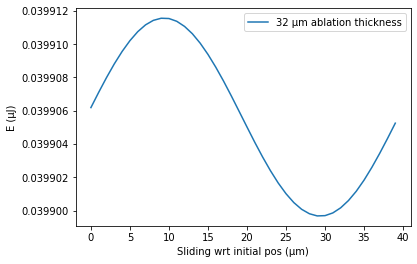

In [29]:
# There is an interesting phenomenon that can be seen by plotting the energy results of consequtive sliding of a zebra patterned graphene layer
plt.plot(results[5], label="32 μm ablation thickness")
plt.ylabel('E (μJ)')
plt.xlabel('Sliding wrt initial pos (μm)')
plt.legend(loc = 'best')
plt.show()

In [26]:
# The energy values seem to form a sinusoidal distribution when consequtive values for constant sliding are put on a chart

In [ ]:
# To see whether this is the case for other configurations, and find out how E changes while the pattern and percentage of ablated regions are kept the same when thickness of regions is increased, we can use the following code:
# 33% graphene patterns will be investigated, with 1u to 8u between ablated regions and respective thickness of ablated region
ee = beam_initialize(res=40, threshold=10**-10, w=35)
for i in range(8,18,2):
    mm = mask_initialize(beam=ee, shape='lines',width=i,thickness=2*i,crop=False)
    bitter = mask_slide_iterator(beam=ee,mask=mm,stepsY=(3*i))
    file = open(str(i)+"-33pc.txt","w")
    file.write(f"Res 40, threshold 10**-10, w=35 \n")
    file.write(f"Zebra width: {str(i)}\nZebra thickness: {str(2*i)}\n")
    counter = 0
    for j in bitter:
        k = integrate_for_energy(j[1])
        file.write(f"Step {counter}: {str(k)}\n")
        counter += 1
        del(j)
    del(mm)
    del(bitter)
    file.close()

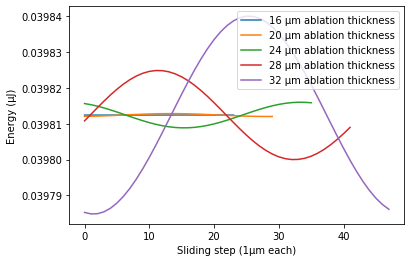

In [32]:
# The energy values for graphene layers with 20,24,28,32um ablation thickness and 10,12,14,16um distance between the ablated regions are as follows:
results = []
for j in range(8,18,2):
    a = []
    with open(f"{j}-33pc.txt",'r') as file:
        for i in range(3):
            _ = file.readline()
        for i in file.readlines():
            a.append(float(i.split()[2]))
    results.append(a)
for i in range(8,18,2):
    plt.plot(results[int((i-8)/2)], label=f"{str(2*i)} μm ablation thickness")
plt.ylabel('Energy (μJ)')
plt.xlabel('Sliding step (1μm each)')
# Note that for every graphene pattern, there are 8um between ablated regions
plt.legend(loc = 'best')

In [ ]:
# As we can see, the sinusoidal behavior is observed again, and increase in ablation thickness with constant ablation percentage does not change the median energy, though the difference between min&max changes, most probably in a nonlinear fashion
# It could be possible to come up with an empirical formula for the amplitude of this sinusoidal wave of energy values of resulting beams while sliding the zebra patterned graphene plate. Although, this might not be worthwile, or would it?
# Finally, we can try to change every parameter to something random to see whether this behavior persists:
ee = beam_initialize(res=40, threshold=10**-10, w=24, Ep=0.058)
for i in range(8,14,2):
    mm = mask_initialize(Js=0.00000022, a0=0.02725, aS=0.00685, beam=ee, shape='lines',width=i,thickness=3*i,crop=False)
    bitter = mask_slide_iterator(beam=ee,mask=mm,stepsY=(2*i))
    file = open(str(i)+"-25pc-Random.txt","w")
    file.write(f"Res 40, threshold 10**-10, w=24, Ep=0.058, a0= \n")
    file.write(f"Js=0.00000022, a0=0.02725, aS=0.00685\n")
    file.write(f"Zebra width: {str(i)}\nZebra thickness: {str(3*i)}\n")
    counter = 0
    for j in bitter:
        k = integrate_for_energy(j[1])
        file.write(f"Step {counter}: {str(k)}\n")
        counter += 1
        del(j)
    del(mm)
    del(bitter)
    file.close()

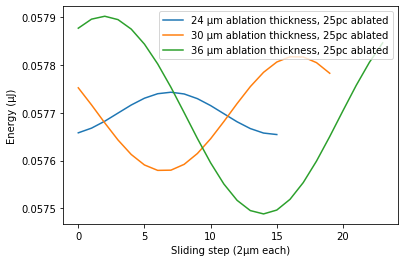

In [34]:
# The results of this random trial, which support our hypothesis, are as follows:
results = []
for j in range(8,14,2):
    a = []
    with open(f"{j}-25pc-Random.txt",'r') as file:
        for i in range(4):
            _ = file.readline()
        for i in file.readlines():
            a.append(float(i.split()[2]))
    results.append(a)
for i in range(8,14,2):
    plt.plot(results[int((i-8)/2)], label=f"{str(3*i)} μm ablation thickness, 25pc ablated")
plt.ylabel('Energy (μJ)')
plt.xlabel('Sliding step (2μm each)')
plt.legend(loc = 'best')

In [ ]:
#####
# As a next step, we can try to see how different geometries affect the beam, maybe starting with triangles or circles.
# Author: Onur Serin
# beam.py can be found at https://github.com/serinos/miscellaneous/blob/master/physlabstuff/beam.py